In [2]:
# ID5059 - Knowledge Discovery & Data Mining
# Coursework Assignment 1 - Individual
# Deadline: Friday 24th February 2023 (week 6), 9pm

In [3]:
################################################################################
###################### IMPORT LIBRARIES, DATA FRAME ############################
################################################################################

# Load libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zlib import crc32
# To split the training from testing sections
from sklearn.model_selection import StratifiedShuffleSplit
# Correlation matrix plots
from pandas.plotting import scatter_matrix
# This line runs on Jupyter Notebook only
#get_ipython().run_line_magic('matplotlib', 'inline')

# Read the dataset from a file
# Specify type 'string' for the 'bed' and 'dealer_zip' attributes to avoid errors interpreting them as numbers
cars = pd.read_csv("/Users/ernakuginyte/Documents/ID5059 Knowledge Discovery and Data Mining/Assignments/Project 1/data/small/used_cars_data_small_0.csv", \
    dtype = {"bed": "string", "dealer_zip": "string"})

                    vin back_legroom   bed bed_height bed_length  \
0     ZACNJABB5KPJ92081      35.1 in  <NA>        NaN        NaN   
1     SALCJ2FX1LH858117      38.1 in  <NA>        NaN        NaN   
2     JF1VA2M67G9829723      35.4 in  <NA>        NaN        NaN   
3     SALRR2RV0L2433391      37.6 in  <NA>        NaN        NaN   
4     SALCJ2FXXLH862327      38.1 in  <NA>        NaN        NaN   
...                 ...          ...   ...        ...        ...   
2755  3FA6P0HD4LR166836      38.3 in  <NA>        NaN        NaN   
2756  4JGDA5HB7HA816383      38.4 in  <NA>        NaN        NaN   
2757  1GTN1TEC7FZ903032           --  <NA>         --    78.9 in   
2758  3N1AB7AP9JY276352      37.4 in  <NA>        NaN        NaN   
2759  5NPEB4AC8BH173139      34.6 in  <NA>        NaN        NaN   

            body_type cabin         city  city_fuel_economy  \
0     SUV / Crossover   NaN      Bayamon                NaN   
1     SUV / Crossover   NaN     San Juan                N

array([[<AxesSubplot:title={'center':'city_fuel_economy'}>,
        <AxesSubplot:title={'center':'combine_fuel_economy'}>,
        <AxesSubplot:title={'center':'daysonmarket'}>,
        <AxesSubplot:title={'center':'engine_displacement'}>],
       [<AxesSubplot:title={'center':'highway_fuel_economy'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'is_certified'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'listing_id'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'owner_count'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'savings_amount'}>,
        <AxesSubplot:title={'center':'seller_rating'}>,
        <AxesSubplot:title={'center':'sp_id'}>],
       [<AxesSubplot:title={'center':'vehicle_damage_category'}>,
        <AxesSubplot:title={'center':'year'}>, <Ax

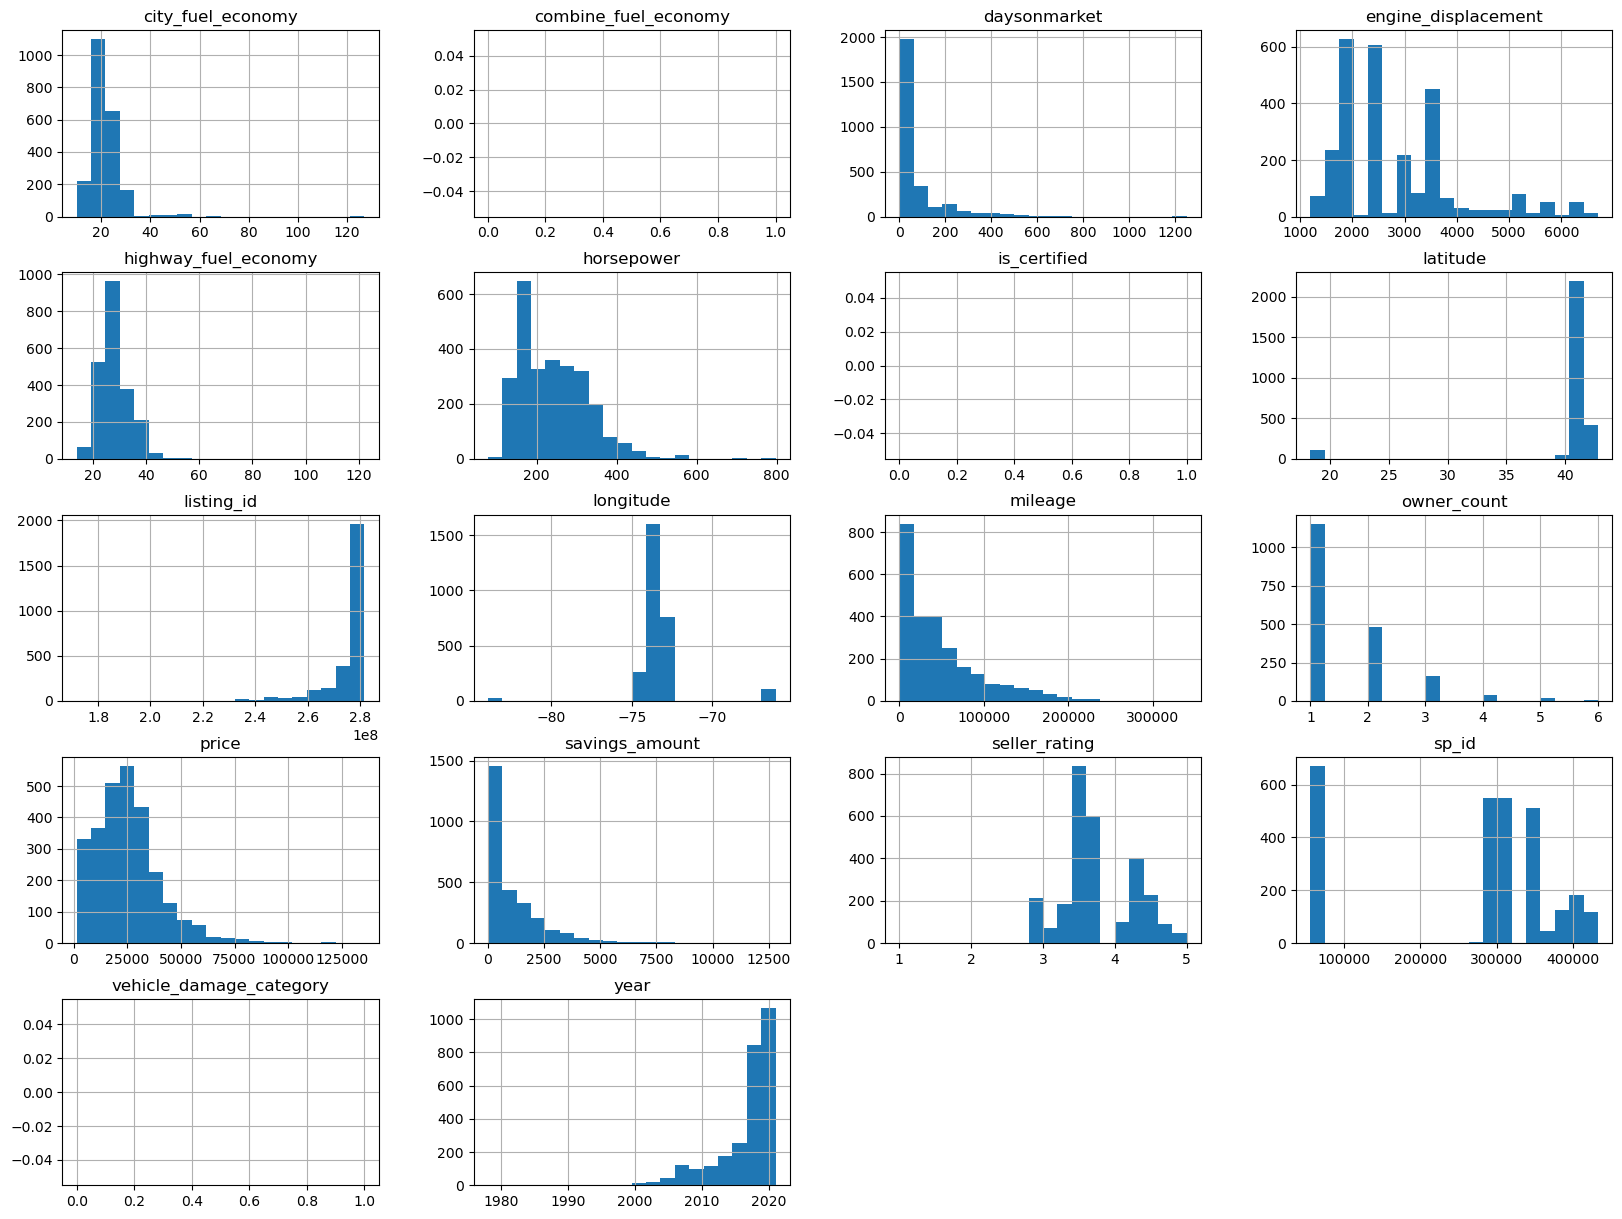

In [4]:
################################################################################
############################# EXPLORE THE DATA #################################
################################################################################

# Clear the maximum number of columns to be displayed, so that all will be visible
pd.set_option('display.max_columns', None)
# Check the basic statistics of the data
cars.describe()
# Display the data frame
print(cars)

# Explore numeric columns visually
cars.hist(bins = 20, figsize = (20,15)) 

In [5]:
################################################################################
############################# DATA WRANGLING ###################################
################################################################################
# Firstly, deal with the missing values.
# Check which columns have only missing values and drop them.
cars = cars.dropna(axis = 1, how = "all")

# Check which columns have some missing values.
# First find the number of missing values in each column.
na_columns = cars.isna().sum()
# Save the column names with missing values
cols_with_na = list(na_columns[na_columns > 0].index)
# Print the column names with number of missing values 
#    out of total number of rows in the data set
for col in cols_with_na:
    print(f"{col}: {na_columns[col]} missing values out of {cars.shape[0]}")

back_legroom: 71 missing values out of 2760
bed: 2753 missing values out of 2760
bed_height: 2628 missing values out of 2760
bed_length: 2628 missing values out of 2760
body_type: 5 missing values out of 2760
cabin: 2748 missing values out of 2760
city_fuel_economy: 580 missing values out of 2760
description: 45 missing values out of 2760
engine_cylinders: 51 missing values out of 2760
engine_displacement: 76 missing values out of 2760
engine_type: 51 missing values out of 2760
fleet: 849 missing values out of 2760
frame_damaged: 849 missing values out of 2760
franchise_make: 1004 missing values out of 2760
front_legroom: 71 missing values out of 2760
fuel_tank_volume: 71 missing values out of 2760
fuel_type: 46 missing values out of 2760
has_accidents: 849 missing values out of 2760
height: 71 missing values out of 2760
highway_fuel_economy: 580 missing values out of 2760
horsepower: 76 missing values out of 2760
isCab: 849 missing values out of 2760
is_cpo: 2436 missing values out of

In [6]:
### clean_df - Cleans dataframe columns with missing data;
###            if more than 25% of rows are missing, the whole column will be dropped;
###            else, add median numeric values to the numeric data, string or object data won't be modified.  
#   INPUT:
#              df - data frame with latent values.
#   OUTPUT:
#              df_cleaned - cleaned data frame.
def clean_df(df):
    
    # Firstly check if the input value is of correct type
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input argument incorrect, it should be a Data Frame! :)")
    # Check if the data frame has any missing values
    if not df.isnull().values.any():
        raise ValueError("Your data frame does not have any missing values, hooray! :)")    
        
    # Find the number of missing values in each column
    na_columns = df.isna().sum()

    # Calculate the percentage of missing values in each column
    na_columns_percent = na_columns / df.shape[0]

    # Get the names of the columns with more than 25% missing values
    cols_to_drop = list(na_columns_percent[na_columns_percent > 0.25].index)

    # Drop the columns with more than 25% missing values
    df_cleaned = df.drop(cols_to_drop, axis = 1)

    # Replace the missing values in the remaining columns with the median value
    # if the column is numeric, otherwise leave the values as is
    for col in df_cleaned.columns:
        # First check if the data type is numeric
        if df_cleaned[col].dtype in ['float64', 'int64']:
            # Fill the missing values with medians
            df_cleaned[col].fillna(df_cleaned[col].median(), inplace = True)
            
    # Return the cleaned data frame
    return df_cleaned

In [7]:
# Apply the function and save the cleaned data frame
cars = clean_df(df = cars)
# Print names of non-numeric columns with the number of missing values.
# Get the number of missing values in each non-numeric column
na_string_columns = cars.isna().sum()

# Get the names of non-numeric columns with missing values
cols_with_na = list(na_string_columns[na_string_columns > 0].index)

# Print the names of non-numeric columns with the number of missing values
for col in cols_with_na:
    print(f"{col}: {na_string_columns[col]} missing values out of {cars.shape[0]}")

back_legroom: 71 missing values out of 2760
body_type: 5 missing values out of 2760
description: 45 missing values out of 2760
engine_cylinders: 51 missing values out of 2760
engine_type: 51 missing values out of 2760
front_legroom: 71 missing values out of 2760
fuel_tank_volume: 71 missing values out of 2760
fuel_type: 46 missing values out of 2760
height: 71 missing values out of 2760
length: 71 missing values out of 2760
main_picture_url: 442 missing values out of 2760
major_options: 127 missing values out of 2760
maximum_seating: 71 missing values out of 2760
power: 173 missing values out of 2760
torque: 195 missing values out of 2760
transmission: 36 missing values out of 2760
transmission_display: 36 missing values out of 2760
trimId: 47 missing values out of 2760
trim_name: 48 missing values out of 2760
wheel_system: 56 missing values out of 2760
wheel_system_display: 56 missing values out of 2760
wheelbase: 71 missing values out of 2760
width: 71 missing values out of 2760


In [8]:
################################################################################
########################## DEAL WITH MISSING VALUES ############################
################################################################################

### fill_na_mean - Take away the " in", "in", " gal" measurement units from data set 
###                variables and converts it to a numeric object;
###                Fills latent variables with mean value.
#   INPUT:  
#                  variables_inches - names of variables that have " in" inches measurement;
#                                     also has some missing values.
#   OUTPUT: 
#                  data - cleaned data frame.
def fill_na_mean(data, vars):

    # Firstly check if the input value is of correct type
    # Check if data is a data frame?
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input argument incorrect, it should be a Data Frame! :)")
    # Check if the data frame has any missing values
    if not data.isnull().values.any():
        raise ValueError("Your data frame does not have any missing values, hooray! :)")
    # Check if the variables_inches vector is not empty
    if len(vars) == 0:
        raise ValueError("Variable list is empty! :)")

        # For each variable in the variables_inches list
    for variable in vars:

        # Check if the variable type is object
        if data[variable].dtype == object:
            # Remove the "in" and "gal" from the values
            data[variable] = data[variable].str.replace(" in", "").str.replace(" gal", "").\
                str.replace("in", "").str.replace("--", "")
            # Convert the string variables to numeric
            data[variable] = pd.to_numeric(data[variable], errors='coerce')
        # Fill missing values with the mean
        data[variable] = data[variable].fillna(data[variable].mean())

    # Return the wrangled data frame
    return data

# Create a list of variables that can 
variables_inches = ["back_legroom", "front_legroom", "height", "length", \
    "wheelbase", "width", "fuel_tank_volume"]

# Apply the fill_na_mean function and save the cleaned data frame
cars = fill_na_mean(data = cars, vars = variables_inches)

# Fill the latent variables in the "transmission" variable
cars["transmission"] = cars["transmission"].apply(lambda x: 1 if x == "yes" else 0)

# Check if the engine_type column is exactly the same as the engine_cylinder?
cars["engine_type"] = cars["engine_cylinders"].str.split(" ", expand=True)[0]

# The variables that have too many missing values or cannot be filled manually
#   as they are character or categorical variables; main_picture_url useless for this analysis
columns_to_drop = ["engine_cylinders", "fuel_type", "main_picture_url", "trimId", \
    "major_options", "power", "torque", "transmission_display", "trim_name", \
        "wheel_system", "wheel_system_display", "main_picture_url"]
# Drop the unwanted variables
cars.drop(columns_to_drop, axis=1, inplace=True)